# Example - 73 - Uranus Aerocapture - Part 2

In this example we illustrate the selection of an aerocapture entry corridor accounting for uncertainties in the atmopsheric profile of Uranus.

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We first create a Planet object for Uranus

In [3]:
planet = Planet('URANUS')
planet.loadAtmosphereModel('../atmdata/Uranus/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_skip = 1000.0E3
planet.h_low  = 120e3
planet.h_trap = 100e3

Load a data file containing Uranus mean atmospheric profile density variations (1-sigma),
and compute density interpolation functions for the following density profiles:

- low : avg - 3-sigma
- avg : avg
- hig : avg + 3-sigma

In [4]:
ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, ATM_density_pert = planet.loadMonteCarloDensityFile2('../atmdata/Uranus/uranus-gram-mean-density-variations.txt', 0, 1, 2, 3, 4, heightInKmFlag=True)
density_int_low = planet.loadAtmosphereModel5(ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, ATM_density_pert, -3.0, 2201, 1)
density_int_avg = planet.loadAtmosphereModel5(ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, ATM_density_pert,  0.0, 2201, 1)
density_int_hig = planet.loadAtmosphereModel5(ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, ATM_density_pert, +3.0, 2201, 1)

Create three Planet objects and set their density interpolation functions manually from above.

In [5]:
planet1 = Planet('URANUS')
planet2 = Planet('URANUS')
planet3 = Planet('URANUS')

planet1.density_int = density_int_low
planet2.density_int = density_int_avg
planet3.density_int = density_int_hig

Compute the density for np.linspace(0, 1000e3, 1001) with the three functions/

In [6]:
h_array = np.linspace(0, 1000e3, 1001)

d_min_arr = planet1.densityvectorized(h_array)
d_avg_arr = planet2.densityvectorized(h_array)
d_max_arr = planet3.densityvectorized(h_array)

Plot the three different mean density profiles.

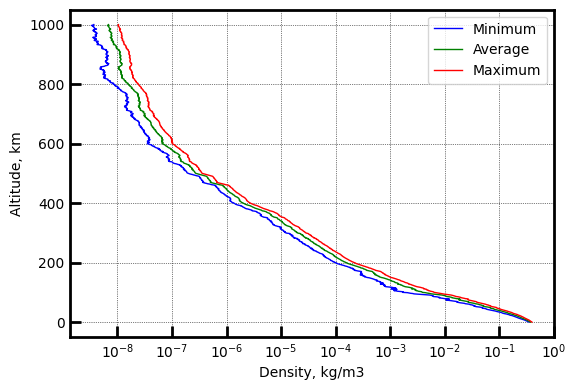

In [7]:
fig = plt.figure()
fig.set_size_inches([6.25, 4.25])
plt.plot(d_min_arr, h_array*1E-3, 'b-', linewidth=1.0, label="Minimum")
plt.plot(d_avg_arr, h_array*1E-3, 'g-', linewidth=1.0, label="Average")
plt.plot(d_max_arr, h_array*1E-3, 'r-', linewidth=1.0, label="Maximum")
plt.xlabel("Density, kg/m3",fontsize=10)
plt.ylabel("Altitude, km",fontsize=10)
plt.xscale('log')
plt.yticks(fontsize=10)
plt.xticks(np.logspace(-8, 0, 9), fontsize=10)
plt.grid('on',linestyle='-', linewidth=0.2)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)
ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    
plt.legend(loc='upper right', fontsize=10, framealpha=0.8)
plt.show()

The variation of the entry corridor in response to mean density variations must be accounted for when selecting the aerocapture entry corridor. Here we illustrate the calculation of the aerocapture entry corridor for the three selected atmospheric profiles.

In [8]:
planet.density_int = density_int_low

vehicle=Vehicle('Titania', 3000.0, 200 , 0.36, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-80.95,25.22,27.5946,132.066,-11.0 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

# Compute the corridor bounds and TCW for low density atnosphere
overShootLimit, exitflag_os  = vehicle.findOverShootLimit2(2400.0,0.1,-25,-4.0,1E-10,500e3)
underShootLimit, exitflag_us  = vehicle.findUnderShootLimit2(2400.0,0.1,-25 ,-4.0,1E-10,500e3)

# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -12.0304 deg
Undershoot limit : -13.6659 deg
TCW: 1.6355 deg


In [9]:
planet.density_int = density_int_avg

vehicle=Vehicle('Titania', 3000.0, 200 , 0.36, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-80.95,25.22,27.5946,132.066,-11.0 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

# Compute the corridor bounds and TCW for low density atnosphere
overShootLimit, exitflag_os  = vehicle.findOverShootLimit2(2400.0,0.1,-25,-4.0,1E-10,500e3)
underShootLimit, exitflag_us  = vehicle.findUnderShootLimit2(2400.0,0.1,-25 ,-4.0,1E-10,500e3)

# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -11.8266 deg
Undershoot limit : -13.4984 deg
TCW: 1.6718 deg


In [10]:
planet.density_int = density_int_hig

vehicle=Vehicle('Titania', 3000.0, 200 , 0.36, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-80.95,25.22,27.5946,132.066,-11.0 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

# Compute the corridor bounds and TCW for low density atnosphere
overShootLimit, exitflag_os  = vehicle.findOverShootLimit2(2400.0,0.1,-25,-4.0,1E-10,500e3)
underShootLimit, exitflag_us  = vehicle.findUnderShootLimit2(2400.0,0.1,-25 ,-4.0,1E-10,500e3)

# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -11.6798 deg
Undershoot limit : -13.3650 deg
TCW: 1.6852 deg


To accomplish aerocapture in both minimum and maximum density atmospheres, the shallow limit should be steeper than the overshoot limit for the minumum density atmosphere and the steep limit should be shallower than the undershoot limit for the maximum density atmosphere. This is graphically shown below.

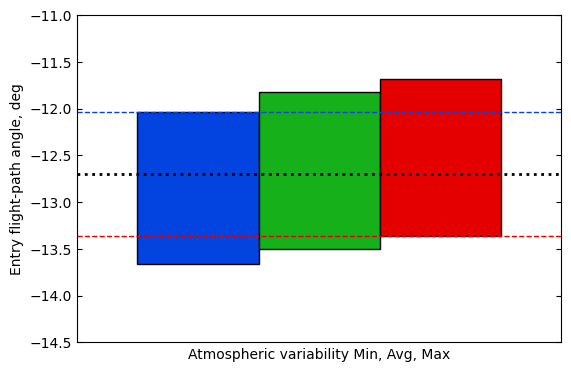

In [11]:
from matplotlib.patches import Polygon

fig = plt.figure()
fig.set_size_inches([6.25,4.25])
     
ax = plt.gca()


x1 = [1.0, 1.0, 2.0, 2.0]
y1 = [-13.6659, -12.0304, -12.0304, -13.6659]

x2 = [2.0, 2.0, 3.0, 3.0]
y2 = [-13.4984, -11.8266, -11.8266, -13.4984]

x3 = [3.0, 3.0, 4.0, 4.0]
y3 = [-13.3650, -11.6798, -11.6798, -13.3650]



poly1 = Polygon( list(zip(x1,y1)), facecolor='xkcd:blue', edgecolor='k')
ax.add_patch(poly1)

poly2 = Polygon( list(zip(x2,y2)), facecolor='xkcd:green', edgecolor='k')
ax.add_patch(poly2)

poly3 = Polygon( list(zip(x3,y3)), facecolor='xkcd:red', edgecolor='k')
ax.add_patch(poly3)


plt.ylabel("Entry flight-path angle, deg",fontsize=10)
plt.xlabel("Atmospheric variability Min, Avg, Max",fontsize=10)

plt.tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 

plt.axhline(y=-12.0304, linewidth=1.0, linestyle='dashed' ,color='xkcd:blue')
plt.axhline(y=-13.3650, linewidth=1.0, linestyle='dashed' ,color='xkcd:red')
plt.axhline(y=0.5*(-13.3650+-12.0304), linewidth=2.0, linestyle='dotted' ,color='xkcd:black')

ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')


ax.set_xlim([0.5, 4.5])
ax.set_ylim([-14.5, -11])


plt.show()

As a preliminary estimate, the target EFPA should be chosen at the middle of the dashed blue and red lines, indicated by the dotted black line. Additional considerations are required because of sensitivity of aerocapture trajectories near the shallow limit, and is typically biased towards the steep end to avoid escape scenarios. This will be the target EFPA (planet-relative) at atmospheric entry targeted during the approach phase.